In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir("C:\\Users\\ratee\\OneDrive\\Documents\\PGDSBA\\\Data Mining\Project")

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


No columns to remove

# Check the Nominal variables

In [7]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [8]:
df.shape

(3000, 10)

## Check for duplicates and drop

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [10]:
df = df.drop_duplicates()
# Decided not to drop as the dataset doesnot contain customer identifier and the duplicates may be actual data

In [11]:
df.shape

(2861, 10)

## Proportion of Target variable

In [12]:
print(df.Claimed.value_counts(normalize=True))

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64


Text(0.5, 1.0, 'Proportion of target variable')

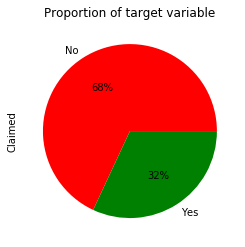

In [13]:
colors = ['r', 'g']
df.Claimed.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of target variable')
#labels = {'No', 'Yes'}
#plt.pie(df.Claimed.value_counts(normalize=True), labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.5)

Text(0.5, 1.0, 'Proportion of Agencies')

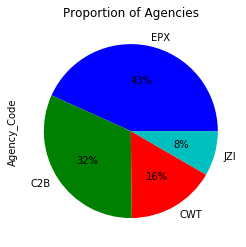

In [14]:
colors = ['b', 'g','r','c']
df.Agency_Code.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Agencies')

Text(0.5, 1.0, 'Proportion of Type')

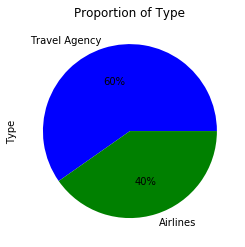

In [15]:
colors = ['b', 'g','r','c']
df.Type.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Type')

Text(0.5, 1.0, 'Proportion of Channels')

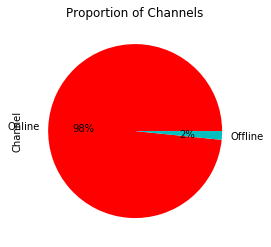

In [16]:
colors = ['r','c']
df.Channel.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Channels')

Text(0.5, 1.0, 'Proportion of Products')

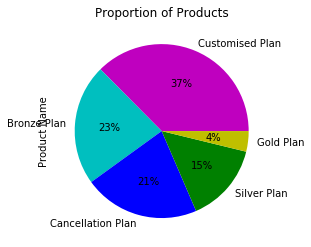

In [17]:
colors = ['m','c','b','g','y']
df['Product Name'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Products')

Text(0.5, 1.0, 'Proportion of Destinations')

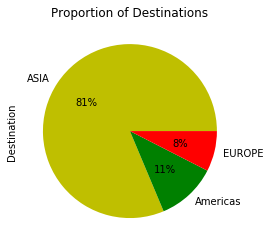

In [18]:
colors = ['y','g','r']
df['Destination'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Destinations')

#Check for outliers of Continuous variables

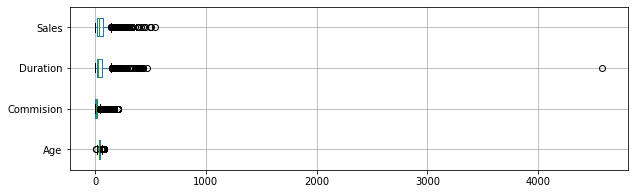

In [19]:
df[['Age','Commision','Duration','Sales']].boxplot(figsize=(10,3), vert = 0)

## Convert Object datatypes to Categorical

In [20]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [21]:
df.describe()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,1.280671,0.597344,0.319469,15.080996,0.983922,72.120238,61.757878,1.666550,0.261797
std,10.678106,1.003773,0.490518,0.466352,25.826834,0.125799,135.977200,71.399740,1.277822,0.586239
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,5.630000,1.000000,28.000000,33.500000,2.000000,0.000000
75%,43.000000,2.000000,1.000000,1.000000,17.820000,1.000000,66.000000,69.300000,2.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


In [22]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
5,45,3,0,1,15.75,1,8,45.00,0,0
6,61,1,1,0,35.64,1,30,59.40,2,1
7,36,2,1,0,0.00,1,16,80.00,1,0
8,36,2,1,0,0.00,1,19,14.00,1,0
9,36,2,1,0,0.00,1,42,43.00,1,0


In [23]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [24]:
l1,u1=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>u1,u1,df['Age'])
df['Age']=np.where(df['Age']<l1,l1,df['Age'])

l2,u2=remove_outlier(df['Commision'])
df['Commision']=np.where(df['Commision']>u2,u2,df['Commision'])
df['Commision']=np.where(df['Commision']<l2,l2,df['Commision'])

l4,u4=remove_outlier(df['Duration'])
df['Duration']=np.where(df['Duration']>u4,u4,df['Duration'])
df['Duration']=np.where(df['Duration']<l4,l4,df['Duration'])

l5,u5=remove_outlier(df['Sales'])
df['Sales']=np.where(df['Sales']>u5,u5,df['Sales'])
df['Sales']=np.where(df['Sales']<l5,l5,df['Sales'])

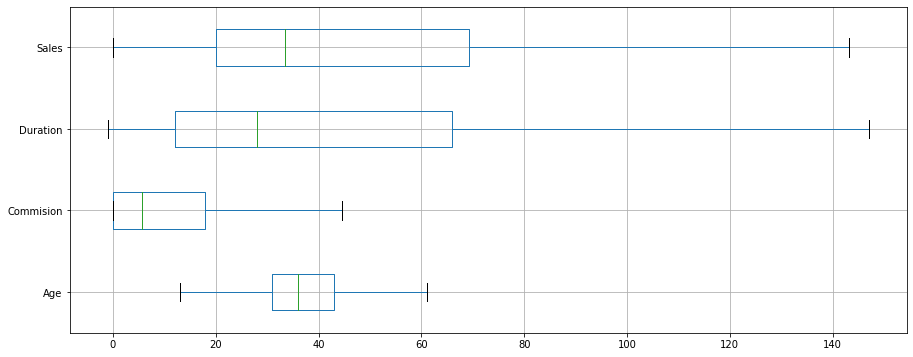

In [25]:
df[['Age','Commision','Duration','Sales']].boxplot(figsize=(15,6), vert = 0)

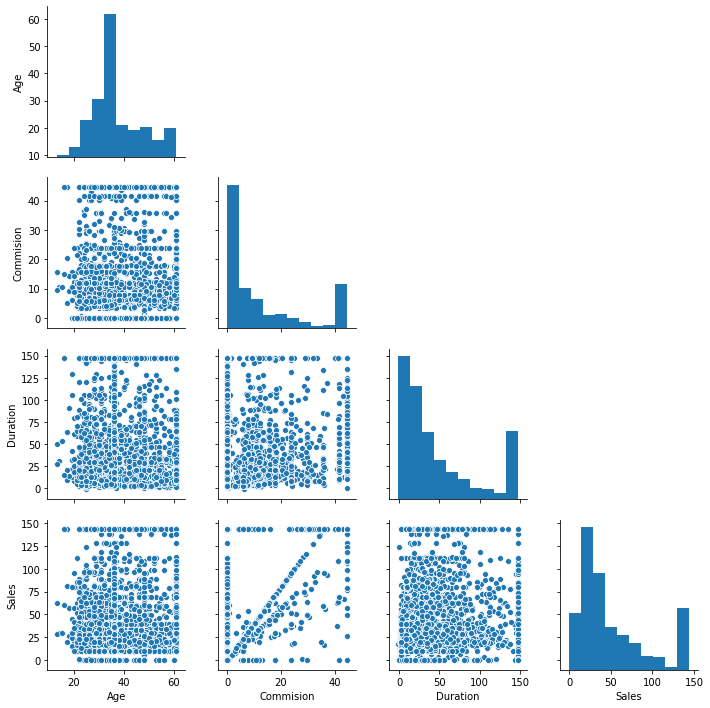

In [26]:
ax = sns.pairplot(df[['Age','Commision','Duration','Sales']])
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)

(4.0, 0.0)

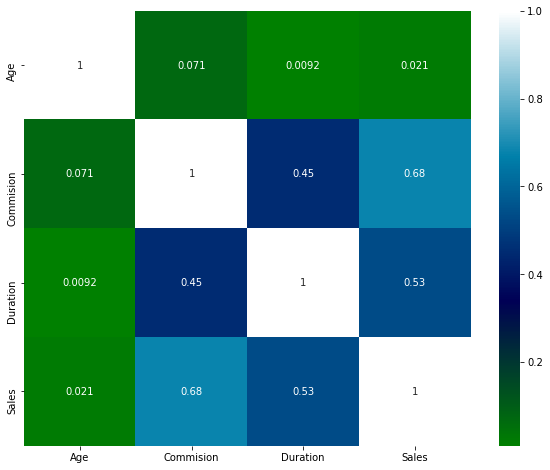

In [27]:
plt.subplots(figsize=(10,8))
ax = sns.heatmap(df[['Age','Commision','Duration','Sales']].corr(), cmap='ocean', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

## Train Test Split

In [28]:
X = df.drop("Claimed" , axis=1)

y = df.pop("Claimed")

In [29]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=123)

In [30]:
# Checking dimensions on the train and test data
print('Train dataset: ',X_train.shape)
print('Test dataset: ',X_test.shape)
print('Train labels: ',train_labels.shape)
print('Test labels: ',test_labels.shape)

Train dataset:  (2002, 9)
Test dataset:  (859, 9)
Train labels:  (2002,)
Test labels:  (859,)


# Model 1: Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [355]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
from sklearn import tree

train_char_label = ['No', 'Yes']
INS_Tree_File = open('insurance_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=INS_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
INS_Tree_File.close()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'max_depth': [ 5, 6, 7 ],
    'min_samples_leaf': [ 6, 7, 8 ],
    'min_samples_split': [ 150, 200, 250 ]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [35]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [150, 200

In [36]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 200}

In [37]:
best_grid = grid_search.best_estimator_

In [41]:
train_char_label = ['No', 'Yes']
INS_Tree_File = open('insurance_tree_best_grid.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file=INS_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
INS_Tree_File.close()

In [42]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False))

              Importance
Agency_Code     0.561991
Sales           0.207891
Product Name    0.132057
Age             0.033536
Duration        0.032702
Commision       0.029825
Destination     0.001999
Type            0.000000
Channel         0.000000


In [43]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    ax = sns.heatmap(cm, cmap = 'icefire', annot=True, fmt='.0f',annot_kws={"fontsize":14},
              xticklabels = ["No", "Yes"],
              yticklabels = ["No", "Yes"],
                    cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

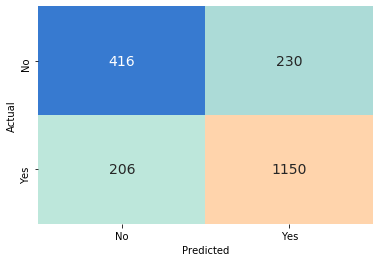

In [46]:
draw_cm(train_labels,ytrain_predict)

In [47]:
#Train Data Accuracy
cart_train_accu = best_grid.score(X_train,train_labels) 
cart_train_accu

0.7822177822177823

In [48]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1356
           1       0.67      0.64      0.66       646

    accuracy                           0.78      2002
   macro avg       0.75      0.75      0.75      2002
weighted avg       0.78      0.78      0.78      2002



In [49]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
cr_df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(cr_df.loc["1"][0],2)
cart_train_recall=round(cr_df.loc["1"][1],2)
cart_train_f1=round(cr_df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.64
cart_train_f1  0.66


In [50]:
cr_df

,precision,recall,f1-score,support
0,0.833333,0.848083,0.840643,1356.000000
1,0.668810,0.643963,0.656151,646.000000
accuracy,0.782218,0.782218,0.782218,0.782218
macro avg,0.751072,0.746023,0.748397,2002.000000
weighted avg,0.780245,0.782218,0.781112,2002.000000


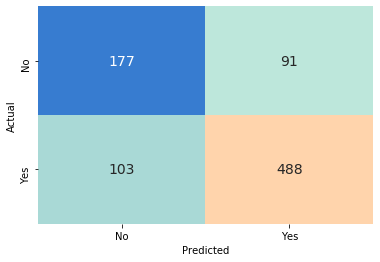

In [51]:
draw_cm(test_labels,ytest_predict)

In [52]:
#Test Data Accuracy
cart_test_accu = best_grid.score(X_test,test_labels) 
cart_test_accu

0.7741559953434226

In [53]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       591
           1       0.63      0.66      0.65       268

    accuracy                           0.77       859
   macro avg       0.74      0.74      0.74       859
weighted avg       0.78      0.77      0.78       859



In [54]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
cdf=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(cdf.loc["1"][0],2)
cart_test_recall=round(cdf.loc["1"][1],2)
cart_test_f1=round(cdf.loc["1"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.63
cart_train_recall  0.66
cart_train_f1  0.65


In [55]:
cdf

,precision,recall,f1-score,support
0,0.842832,0.825719,0.834188,591.000000
1,0.632143,0.660448,0.645985,268.000000
accuracy,0.774156,0.774156,0.774156,0.774156
macro avg,0.737488,0.743083,0.740087,859.000000
weighted avg,0.777099,0.774156,0.775471,859.000000


## AUC and ROC for the training data

AUC: 0.830


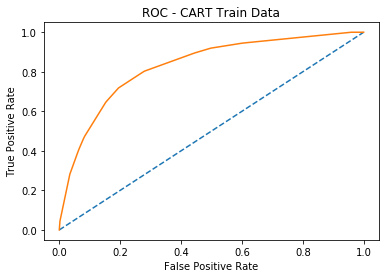

In [56]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
#auc
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - CART Train Data')
# show the plot
plt.show()

## AUC and ROC for the test data

AUC: 0.784


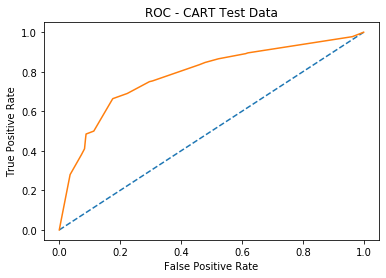

In [57]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - CART Test Data')
# show the plot
plt.show()

# Model 2: Random Forest Classification

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [ 6, 8, 10 ],              #[ 10, 12, 14],
    'max_features': [ 4, 5 ],           #[ 4, 5, 6],
    'min_samples_leaf': [ 10, 20, 30 ],     #[ 30, 40, 50 ],
    'min_samples_split': [ 30, 40, 50 ],    #[ 60, 75, 90],
    'n_estimators': [  70, 100, 150 ]        #[ 150, 200, 250]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)


In [62]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [63]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 40,
 'n_estimators': 70}

In [64]:
best_grid = grid_search.best_estimator_

In [65]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

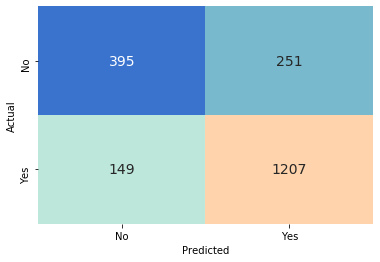

In [66]:
draw_cm(train_labels,ytrain_predict)

In [67]:
#Train Data Accuracy
rf_train_accu = best_grid.score(X_train,train_labels) 
rf_train_accu

0.8001998001998002

In [68]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1356
           1       0.73      0.61      0.66       646

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002



In [69]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
rf_df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(rf_df.loc["1"][0],2)
rf_train_recall=round(rf_df.loc["1"][1],2)
rf_train_f1=round(rf_df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.73
rf_train_recall  0.61
rf_train_f1  0.66


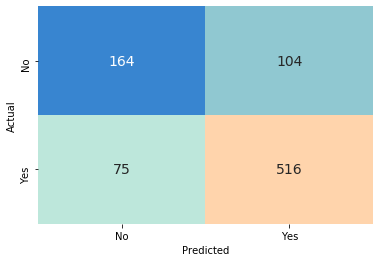

In [70]:
draw_cm(test_labels,ytest_predict)

In [71]:
#Test Data Accuracy
rf_test_accu = best_grid.score(X_test,test_labels) 
rf_test_accu

0.7916181606519208

In [72]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       591
           1       0.69      0.61      0.65       268

    accuracy                           0.79       859
   macro avg       0.76      0.74      0.75       859
weighted avg       0.79      0.79      0.79       859



In [73]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
rf_df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(rf_df.loc["1"][0],2)
rf_test_recall=round(rf_df.loc["1"][1],2)
rf_test_f1=round(rf_df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.69
rf_test_recall  0.61
rf_test_f1  0.65


AUC: 0.864


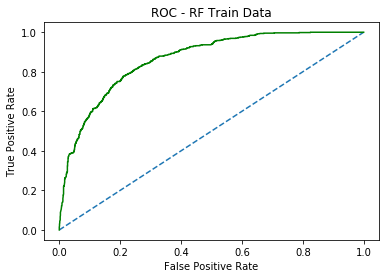

In [74]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(train_labels, probs)
#auc
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#plt.plot(fpr, tpr, marker='.')
plt.plot(rf_train_fpr, rf_train_tpr, color ='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - RF Train Data')
# show the plot
plt.show()

AUC: 0.807


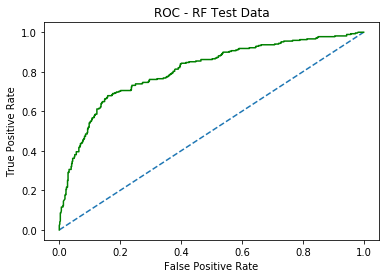

In [75]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - RF Test Data')
# show the plot
plt.show()

In [398]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False))

              Importance
Agency_Code     0.296389
Product Name    0.200782
Sales           0.193358
Commision       0.095742
Duration        0.087776
Age             0.056932
Type            0.056786
Destination     0.010150
Channel         0.002085


# Model 3: MLP Classifier

In [76]:
from sklearn.neural_network import MLPClassifier

In [278]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [77]:
param_grid = {
    'hidden_layer_sizes': [ 50, 100  ],   #[ ( 150, 100, 50 ), (150, 100), (100, 50), 100, 50 ],
    'activation': [ 'relu' ],        #['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'sgd'],              #['sgd', 'adam', 'lbfgs'],
    'tol': [ 0.001 ],                #[0.01, 0.001],                           
    'learning_rate': ['constant'],   #['constant','adaptive'],
    'max_iter': [5000], 
}

mlpc = MLPClassifier()

grid_search = GridSearchCV(estimator = mlpc, param_grid = param_grid, cv = 10)

In [78]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu'],
                       

In [79]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 50,
 'learning_rate': 'constant',
 'max_iter': 5000,
 'solver': 'adam',
 'tol': 0.001}

In [80]:
best_grid = grid_search.best_estimator_

In [81]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

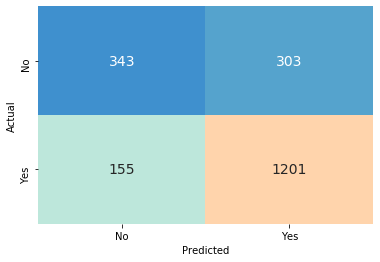

In [82]:
draw_cm(train_labels,ytrain_predict)

In [83]:
#Train Data Accuracy
ann_train_accu = best_grid.score(X_train,train_labels) 
ann_train_accu

0.7712287712287712

In [84]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1356
           1       0.69      0.53      0.60       646

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [85]:
ann_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
ann_df=pd.DataFrame(ann_metrics).transpose()
ann_train_precision=round(ann_df.loc["1"][0],2)
ann_train_recall=round(ann_df.loc["1"][1],2)
ann_train_f1=round(ann_df.loc["1"][2],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_precision  0.69
ann_train_recall  0.53
ann_train_f1  0.6


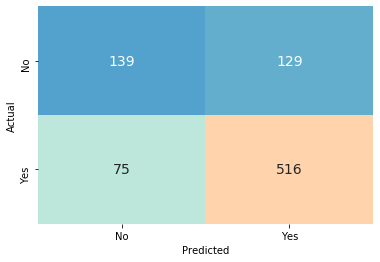

In [86]:
draw_cm(test_labels,ytest_predict)

In [87]:
#Test Data Accuracy
ann_test_accu = best_grid.score(X_test,test_labels) 
ann_test_accu

0.7625145518044237

In [88]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       591
           1       0.65      0.52      0.58       268

    accuracy                           0.76       859
   macro avg       0.72      0.70      0.71       859
weighted avg       0.75      0.76      0.75       859



In [89]:
ann_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
ann_df=pd.DataFrame(ann_metrics).transpose()
ann_test_precision=round(ann_df.loc["1"][0],2)
ann_test_recall=round(ann_df.loc["1"][1],2)
ann_test_f1=round(ann_df.loc["1"][2],2)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_precision  0.65
ann_test_recall  0.52
ann_test_f1  0.58


AUC: 0.803


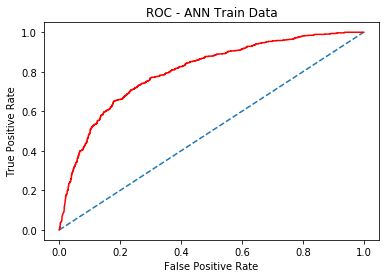

In [90]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(train_labels, probs)
#auc
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#plt.plot(fpr, tpr, marker='.')
plt.plot(ann_train_fpr, ann_train_tpr, color ='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - ANN Train Data')
# show the plot
plt.show()

AUC: 0.786


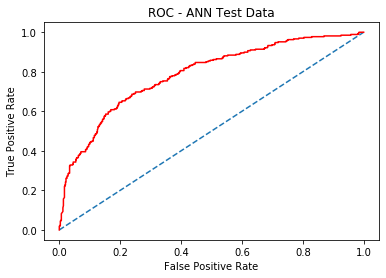

In [91]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % ann_test_auc)
# calculate roc curve
ann_test_fpr, ann_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr, color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - ANN Test Data')
# show the plot
plt.show()

# Final conclusion

In [92]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_accu,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_accu,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'RF Train':[rf_train_accu,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_accu,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'ANN Train':[ann_train_accu,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'ANN Test':[ann_test_accu,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,RF Train,RF Test,ANN Train,ANN Test
Accuracy,0.78,0.77,0.80,0.79,0.77,0.76
AUC,0.83,0.78,0.86,0.81,0.80,0.79
Recall,0.64,0.66,0.61,0.61,0.53,0.52
Precision,0.67,0.63,0.73,0.69,0.69,0.65
F1 Score,0.66,0.65,0.66,0.65,0.60,0.58


Text(0.5, 24.0, 'PREDICTION MODELS')

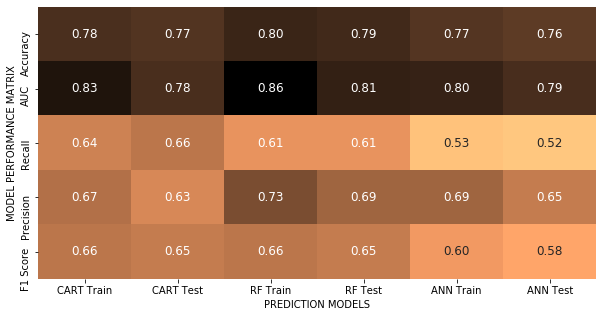

In [93]:
plt.subplots(figsize=(10,5))
ax = sns.heatmap(data, cmap='copper_r', annot=True, fmt='.2f',annot_kws={"fontsize":12}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.ylabel('MODEL PERFORMANCE MATRIX')
plt.xlabel('PREDICTION MODELS')

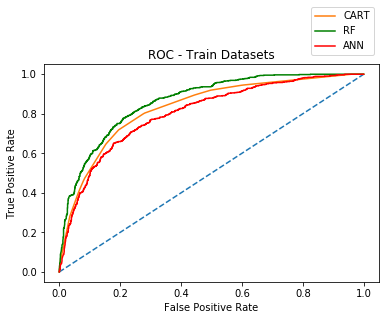

In [94]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='red',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Datasets')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

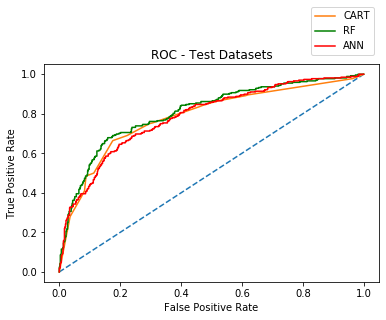

In [95]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='red',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Datasets')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')